In [ ]:
nopip install split_folders is

In [ ]:
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_folder = "/content/drive/MyDrive/Minor project/Dataset/train"
output = "/content/drive/MyDrive/Minor project/processed_
data"
splitfolders.ratio(input_folder, output, seed=42, ratio=(.6, .2, .2))

Copying files: 10240 files [04:48, 35.49 files/s] 


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import pickle

In [2]:
img_height,img_width=(224,224)
batch_size = 70

train_data_dir = r"/content/drive/MyDrive/Minor project/processed_data/train"
valid_data_dir = r"/content/drive/MyDrive/Minor project/processed_data/val"
test_data_dir = r"/content/drive/MyDrive/Minor project/processed_data/test"

In [3]:
# Create ImageDataGenerator for training with caching (specifying the number of channels)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    vertical_flip=True,
)

# Create a cached training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.4,
    subset="training",
    labels="inferred",
    seed=42,
).map(lambda x, y: (preprocess_input(x), tf.one_hot(y, depth=4))).cache()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 6144 files belonging to 4 classes.
Using 3687 files for training.


In [11]:
for x, y in train_ds.take(1):  # Take one batch
    print(x.shape)

(70, 224, 224, 3)


In [4]:
# Create ImageDataGenerator for validation
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    vertical_flip=True,
)

# Create a cached validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.4,
    subset="validation",
    labels="inferred",
    seed=42,
).map(lambda x, y: (preprocess_input(x),  tf.one_hot(y, depth=4))).cache()

Found 2048 files belonging to 4 classes.
Using 819 files for validation.


In [13]:
for x, y in val_ds.take(1):  # Take one batch
    print(x.shape)

(70, 224, 224, 3)


In [5]:
# Create ImageDataGenerator for testing
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create a non-cached testing dataset (since test set is typically evaluated once)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    seed=42
).map(lambda x, y: (preprocess_input(x),  tf.one_hot(y, depth=4)))

Found 2048 files belonging to 4 classes.


In [15]:
for x, y in test_ds.take(1):  # Take one batch
    print(x.shape)

(70, 224, 224, 3)


In [6]:
base_model = ResNet50V2(include_top=False, weights='imagenet')
base_model.summary()

94668760/94668760 [==============================] - 0s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, None, None, 64)       0         ['conv1_conv[0][0]']          
                        

In [7]:
base_model.trainable = True

set_trainable = False

for layer in base_model.layers:
  if layer.name == 'conv5_block1_1_conv':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_1 False
conv1_pad False
conv1_conv False
pool1_pad False
pool1_pool False
conv2_block1_preact_bn False
conv2_block1_preact_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_pad False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_out False
conv2_block2_preact_bn False
conv2_block2_preact_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_pad False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_out False
conv2_block3_preact_bn False
conv2_block3_preact_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_pad False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
max_pooling2d False
conv2_block3_3_conv False
conv2_block3_out False
conv3_block1_pre

In [9]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Input,Dropout
from keras.callbacks import History

In [10]:
input_shape = (img_height, img_width, 3)
input_layer = Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu')(base_model(input_layer))
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.1)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)

predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=input_layer, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Apply caching to the datasets and preprocess input
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y)).cache()
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y)).cache()

# Train the model using the cached datasets
history = model.fit(train_ds, epochs=30, verbose=2, validation_data=val_ds, callbacks=[History()])

model.summary()

Epoch 1/30
53/53 - 586s - loss: 1.2020 - accuracy: 0.4424 - val_loss: 2.2092 - val_accuracy: 0.5336 - 586s/epoch - 11s/step
Epoch 2/30
53/53 - 14s - loss: 0.6693 - accuracy: 0.6957 - val_loss: 3.7794 - val_accuracy: 0.5812 - 14s/epoch - 264ms/step
Epoch 3/30
53/53 - 14s - loss: 0.5390 - accuracy: 0.7673 - val_loss: 1.4056 - val_accuracy: 0.7216 - 14s/epoch - 266ms/step
Epoch 4/30
53/53 - 14s - loss: 0.4438 - accuracy: 0.8150 - val_loss: 1.2827 - val_accuracy: 0.7643 - 14s/epoch - 267ms/step
Epoch 5/30
53/53 - 14s - loss: 0.3615 - accuracy: 0.8511 - val_loss: 0.8729 - val_accuracy: 0.7802 - 14s/epoch - 268ms/step
Epoch 6/30
53/53 - 14s - loss: 0.3123 - accuracy: 0.8725 - val_loss: 1.0650 - val_accuracy: 0.7473 - 14s/epoch - 269ms/step
Epoch 7/30
53/53 - 14s - loss: 0.3368 - accuracy: 0.8733 - val_loss: 2.0912 - val_accuracy: 0.7436 - 14s/epoch - 271ms/step
Epoch 8/30
53/53 - 14s - loss: 0.2529 - accuracy: 0.9062 - val_loss: 1.2493 - val_accuracy: 0.7460 - 14s/epoch - 272ms/step
Epoch 9/

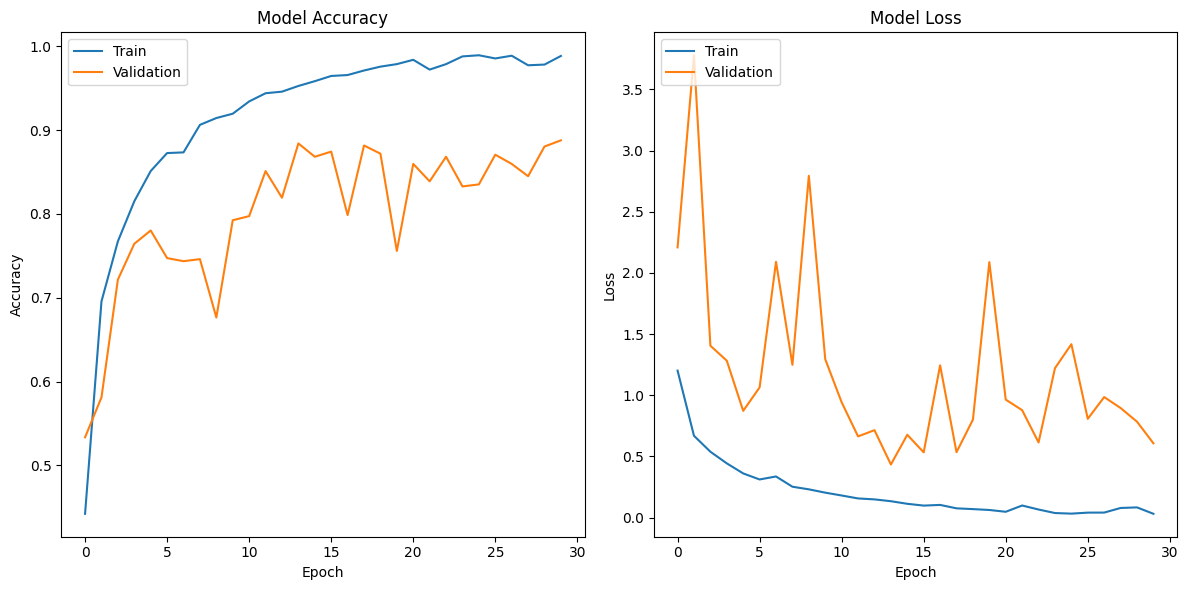

In [11]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [10]:
val_pred_probs = model.predict(val_ds)
val_pred_labels = np.argmax(val_pred_probs, axis=1)

# Assuming val_ds is a dataset with true labels
val_true_labels = np.argmax(np.concatenate([y for _, y in val_ds], axis=0), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)


12/12 [==============================] - 3s 182ms/step
Confusion Matrix:
[[165   0   3  16]
 [  1 211   0   0]
 [  1   0 184  35]
 [  1   0  17 185]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# Assuming you have a test dataset named test_ds
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y)).cache()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


30/30 [==============================] - 7s 235ms/step - loss: 0.9883 - accuracy: 0.8950
Test Accuracy: 89.50%
Test Loss: 0.9883


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, History
import pickle

In [ ]:
history_callback = History()
training_accuracy = history_callback.history['accuracy']
validation_accuracy = history_callback.history['val_accuracy']
training_loss = history_callback.history['loss']
validation_loss = history_callback.history['val_loss']

with open('rresnet_history2.pkl', 'wb') as file:
    training_history = {
        'accuracy': training_accuracy,
        'loss': training_loss,
        'val_accuracy': validation_accuracy,
        'val_loss': validation_loss
    }
    pickle.dump(training_history, file)


In [16]:
model.save('RESNET50V2._model.h5')